Import libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset load

In [22]:
df = pd.read_csv('/content/salary.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

drop unnecessary column

In [24]:
df = df.drop(['fnlwgt', 'workclass', 'education', 'native-country', 'capital-loss', 'sex', 'race', 'relationship', 'occupation', 'marital-status'], axis=1)


In [25]:
df.head()

,age,education-num,capital-gain,hours-per-week,salary
0,39,13,2174,40,<=50K
1,50,13,0,13,<=50K
2,38,9,0,40,<=50K
3,53,7,0,40,<=50K
4,28,13,0,40,<=50K


mapping salary into binary

In [ ]:
df["salary"] = df["salary"].str.strip()

#encoding
df["salary"] = df["salary"].map({"<=50K": 0, ">50K": 1}).astype(int)

df.head()

In [29]:
df.tail()

,age,education-num,capital-gain,hours-per-week,salary
32556,27,12,0,38,0
32557,40,9,0,40,1
32558,58,9,0,40,0
32559,22,9,0,20,0
32560,52,9,15024,40,1


missing value check

In [31]:
pd.DataFrame({'null':  df.isnull().sum()})

,null
age,0
education-num,0
capital-gain,0
hours-per-week,0
salary,0


segregate

In [32]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]



In [35]:
y.tail()

,salary
32556,0
32557,1
32558,0
32559,0
32560,1


split dataset

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=0)

Feature scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Finding k-Value

Text(0, 0.5, 'Mean Error')

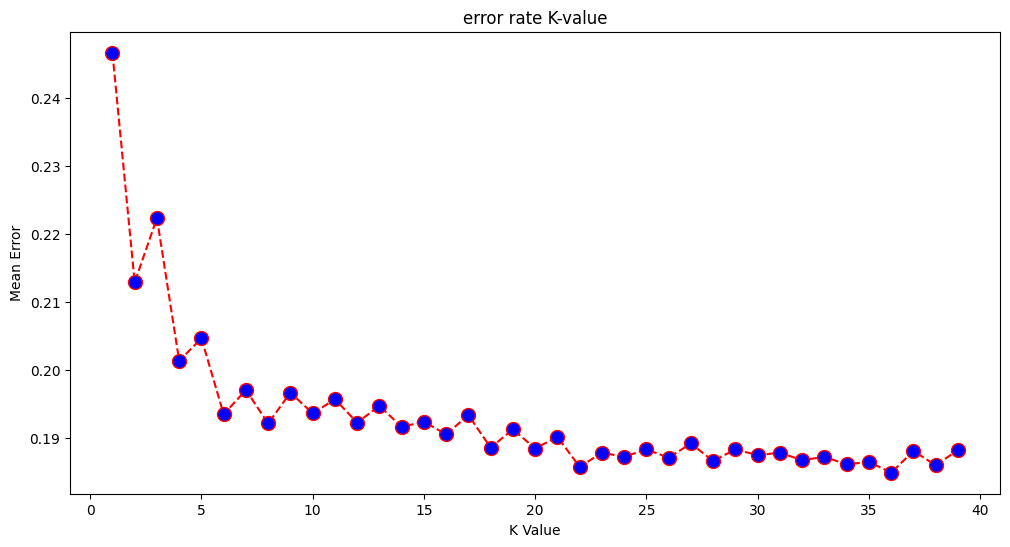

In [38]:
error = []
from sklearn.neighbors import KNeighborsClassifier #alg.

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred_i = model. predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1,40), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor='blue', markersize=10)
plt.title("error rate K-value")
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Train and predict data

In [39]:
model = KNeighborsClassifier(n_neighbors = 36, metric = 'minkowski', p = 2)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

Validation

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy model: 81.51332760103182%


prediction output

In [41]:
age = int(input("Enter age: "))
edu = int(input("Enter education level: "))
cg = int(input("Enter capital gain: "))
wh = int(input("Enter working hours per week: "))

NewEmployee = [[age, edu, cg, wh]]

result = model.predict(sc.transform(NewEmployee))
print(result)

if result == 1:
    print("The salary is likely above 50K.")
elif result == 0:
    print("The salary is likely below 50K.")

Enter age: 30
Enter education level: 13
Enter capital gain: 1200
Enter working hours per week: 40
[0]
The salary is likely below 50K.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
